In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

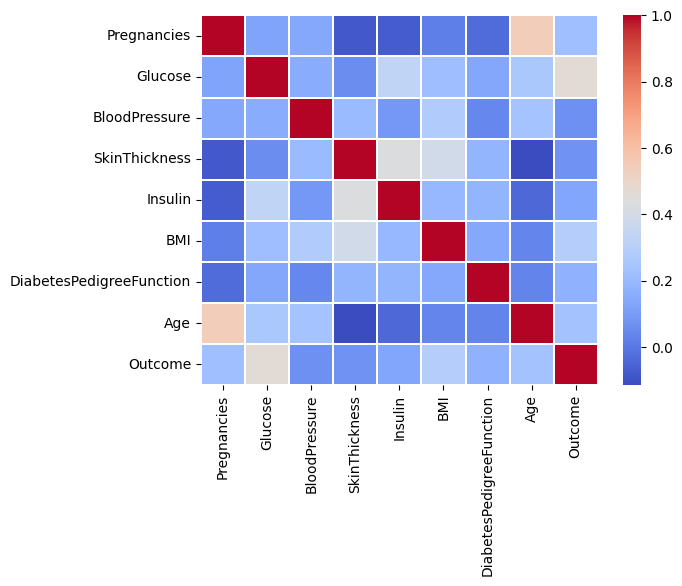

In [7]:
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=0.2)

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


C:\Users\agamb\AppData\Local\Temp\ipykernel_32276\2320968130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['SkinThickness'],x=df['Outcome'],palette='viridis',ax=ax[0,0])
C:\Users\agamb\AppData\Local\Temp\ipykernel_32276\2320968130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['BloodPressure'],x=df['Outcome'],palette='viridis',ax=ax[0,1])
C:\Users\agamb\AppData\Local\Temp\ipykernel_32276\2320968130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Glucose'],x=df['Outcome'],palette='viridis',ax=ax[1,0])
C:\Users\a

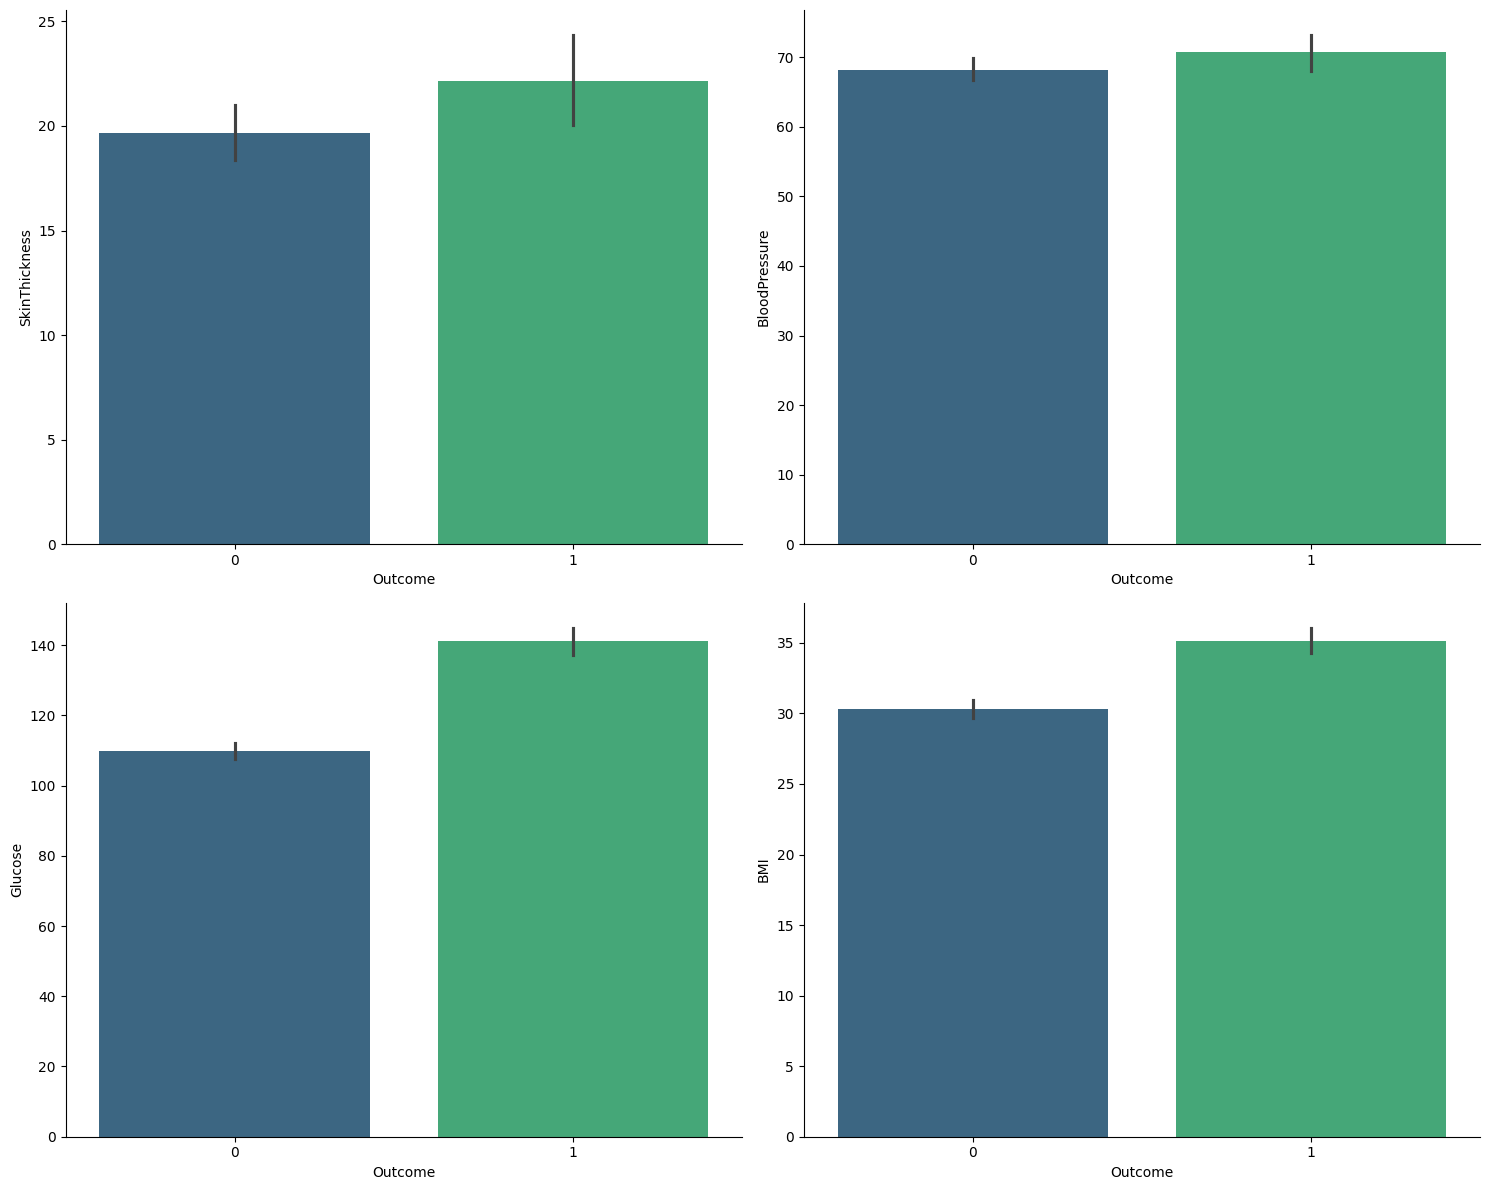

In [9]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
sns.barplot(y=df['SkinThickness'],x=df['Outcome'],palette='viridis',ax=ax[0,0])
sns.barplot(y=df['BloodPressure'],x=df['Outcome'],palette='viridis',ax=ax[0,1])
sns.barplot(y=df['Glucose'],x=df['Outcome'],palette='viridis',ax=ax[1,0])
sns.barplot(y=df['BMI'],x=df['Outcome'],palette='viridis',ax=ax[1,1])
sns.despine()
plt.tight_layout()
plt.show()

In [10]:
scaler = StandardScaler()

In [11]:
X = df.drop(columns='Outcome',axis=1)
Y =df['Outcome']

In [12]:
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [13]:
standardised_data = scaler.transform(X)

In [14]:
X = standardised_data

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred = model.predict(x_test)

In [18]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification report:")
print(classification_report(y_test,y_pred))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[79 20]
 [18 37]]
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy score:
0.7532467532467533


In [19]:
model2 = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42)
model2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
y_pred2 = model2.predict(x_test)

In [21]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred2))
print("Classification report:")
print(classification_report(y_test,y_pred2))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred2))

confusion matrix:
[[77 22]
 [16 39]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Accuracy score:
0.7532467532467533


In [22]:
from sklearn.ensemble import RandomForestClassifier
model_ensemble = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=42,criterion='gini')
model_ensemble.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
y_pred_ensemble = model_ensemble.predict(x_test)

In [24]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_ensemble))
print("Classification report:")
print(classification_report(y_test,y_pred_ensemble))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred_ensemble))

confusion matrix:
[[92  7]
 [25 30]]
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154

Accuracy score:
0.7922077922077922


In [25]:
from xgboost import XGBClassifier,plot_importance
model_ensemble2 = XGBClassifier()
model_ensemble2.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [26]:
y_pred_ensemble2 = model_ensemble2.predict(x_test)

In [27]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_ensemble2))
print("Classification report:")
print(classification_report(y_test,y_pred_ensemble2))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred_ensemble2))

confusion matrix:
[[72 27]
 [16 39]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

Accuracy score:
0.7207792207792207


In [28]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=50,random_state=42,estimator=model2,learning_rate=3.0)
adaboost_model.fit(x_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,learning_rate,3.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [29]:
y_pred_ada = adaboost_model.predict(x_test)

In [30]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_ada))
print("Classification report:")
print(classification_report(y_test,y_pred_ada))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred_ada))

confusion matrix:
[[86 13]
 [20 35]]
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

Accuracy score:
0.7857142857142857
